<a href="https://colab.research.google.com/github/raj-hero/UGProject/blob/main/btp_mave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAVERICK'S JUPYTER NOTEBOOK

## DATA PRE-PROCESSING

The given dataset contains info about load, temp,humidity and other factors of a city.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('load.csv')
data= df.copy()
# data

In [ ]:
df['Datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index(['Datetime'])
del df['datetime']
# df

The below code shows that we have no missing values in any column

In [ ]:
scaler = MinMaxScaler()
# model=scaler.fit(data_f)
# df=model.transform(data_f)
df[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday','net_demand']]=scaler.fit_transform(df[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday','net_demand']])
df

,temp_2M,humidity_2M,precipitation_2M,wind_speed_2M,holiday,net_demand
Datetime,,,,,,
2015-01-03 01:00:00,0.240921,0.613218,0.031030,0.556888,0.0,0.530130
2015-01-03 02:00:00,0.243734,0.620449,0.031499,0.564955,0.0,0.495291
2015-01-03 03:00:00,0.246880,0.631220,0.029698,0.572297,0.0,0.488160
2015-01-03 04:00:00,0.248557,0.642709,0.031221,0.563516,0.0,0.481983
2015-01-03 05:00:00,0.249905,0.651273,0.033153,0.539947,0.0,0.484218
...,...,...,...,...,...,...
2020-06-26 20:00:00,0.355208,0.775576,0.106499,0.236618,0.0,0.624887
2020-06-26 21:00:00,0.343048,0.784191,0.103308,0.250595,0.0,0.615418
2020-06-26 22:00:00,0.332423,0.789221,0.109836,0.261430,0.0,0.596743


In [ ]:
df.isna().sum()

temp_2M             0
humidity_2M         0
precipitation_2M    0
wind_speed_2M       0
holiday             0
net_demand          0
dtype: int64

## USING LINEAR REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
# print(X)
# print(y);

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

In [ ]:
y_test

array([0.8095, 0.8382, 0.8788, ..., 0.6074, 0.5408, 0.7045])

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=4)

In [ ]:
y_pred

array([0.8245, 0.7822, 0.7608, ..., 0.5685, 0.6098, 0.6255])

In [ ]:
# print(y_test)

In [ ]:
r2_score(y_test,y_pred)
print('r2_score:',r2_score(y_test,y_pred))

r2_score: 0.4618536117313037


In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('rmse:',rmse)

rmse: 0.08427271142053164


In [ ]:
df['net_demand'].mean()
print('Mean of all net demands given in last column:',df['net_demand'].mean())

Mean of all net demands given in last column: 0.6574133377687457


In [ ]:
error_percent = (rmse/df['net_demand'].mean())*100
print('error_percent:',error_percent)

error_percent: 12.818832016179101


In [ ]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.07
Accuracy: 89.22 %.


PLOTTING THE RESULT

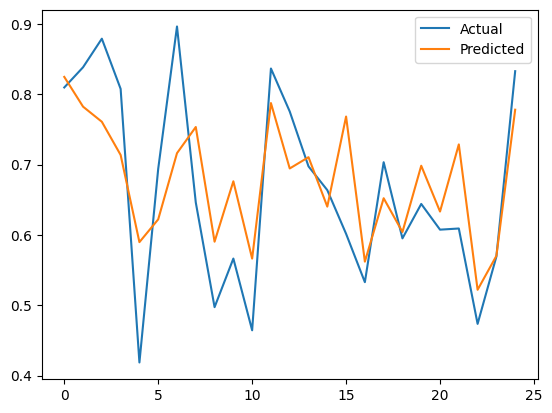

In [ ]:
plt.plot(y_test[0:25], label='Actual')
plt.plot(y_pred[0:25], label='Predicted')
plt.legend()
plt.show()

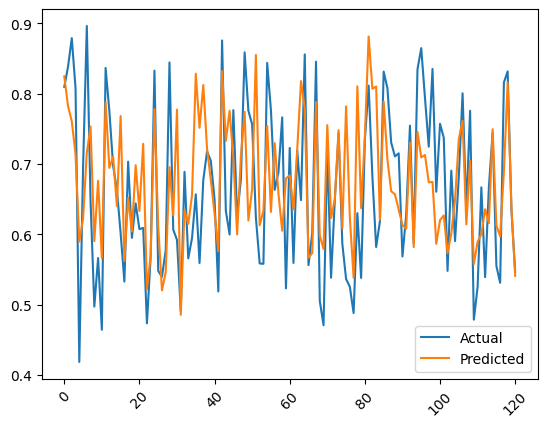

In [ ]:
plt.plot(y_test[0:121], label='Actual')
plt.plot(y_pred[0:121], label='Predicted')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## USING RANDOM FOREST ALGORITHM

In [ ]:
data.drop('datetime', axis=1, inplace=True)

In [ ]:
scaler = MinMaxScaler()
# model=scaler.fit(data_f)
# df=model.transform(data_f)
data[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday','net_demand']]=scaler.fit_transform(data[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday','net_demand']])
data

,temp_2M,humidity_2M,precipitation_2M,wind_speed_2M,holiday,net_demand
0,0.240921,0.613218,0.031030,0.556888,0.0,0.530130
1,0.243734,0.620449,0.031499,0.564955,0.0,0.495291
2,0.246880,0.631220,0.029698,0.572297,0.0,0.488160
3,0.248557,0.642709,0.031221,0.563516,0.0,0.481983
4,0.249905,0.651273,0.033153,0.539947,0.0,0.484218
...,...,...,...,...,...,...
48043,0.355208,0.775576,0.106499,0.236618,0.0,0.624887
48044,0.343048,0.784191,0.103308,0.250595,0.0,0.615418
48045,0.332423,0.789221,0.109836,0.261430,0.0,0.596743
48046,0.323845,0.790665,0.123126,0.263065,0.0,0.572820


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
# X

In [ ]:
# y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
#new_y_test = y_test
y_test

array([0.8095, 0.8382, 0.8788, ..., 0.6074, 0.5408, 0.7045])

In [ ]:
#Import the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
#Create a Random Forest regressor object from Random Forest Regressor class
RFReg = RandomForestRegressor(n_estimators = 200, random_state = 0)
#Fit the random forest regressor with training data represented by X_train and y_train
RFReg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [ ]:
# RandomForestRegressor(bootstrap=True, criterion='rmse', max_depth=10,
#                       max_features='auto', max_leaf_nodes=None,
#                       min_impurity_decrease=0.0,
#                       min_samples_leaf=1, min_samples_split=2,
#                       min_weight_fraction_leaf=0.0, n_estimators=500,
#                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
#                       warm_start=False)

In [ ]:
#Predicted load from test dataset w.r.t Random Forest Regression
y_predict_rfr = RFReg.predict((X_test))
y_predict_rfr


array([0.7908, 0.8227, 0.7715, ..., 0.572 , 0.5783, 0.6345])

In [ ]:
# print(y_test)

In [ ]:
#Model Evaluation using RMSE for Random Forest Regression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
rmse_new = mean_squared_error(y_test, y_predict_rfr, squared=False)
print('rmse associated with Random Forest Regression is:', rmse_new)

rmse associated with Random Forest Regression is: 0.07445651579221484


In [ ]:
error_percent_new = ((rmse_new/y_test.mean())*100)/2
print('error_percent_new:',error_percent_new)

error_percent_new: 5.657128118256079


In [ ]:
# Calculate the absolute errors
errors = abs(y_predict_rfr - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.06
Accuracy: 90.92 %.


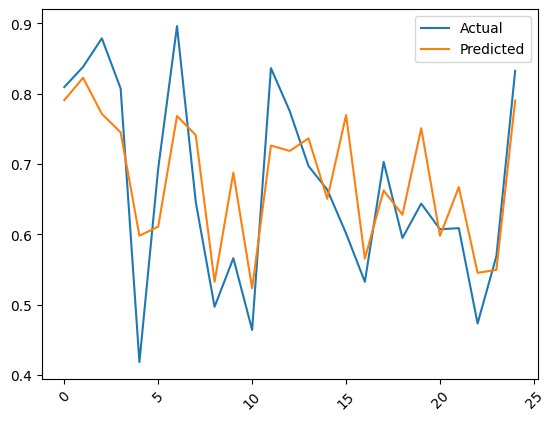

In [ ]:
plt.plot(y_test[0:25], label='Actual')
plt.plot(y_predict_rfr[0:25], label='Predicted')
plt.xticks(rotation=45)
plt.legend()
plt.show()

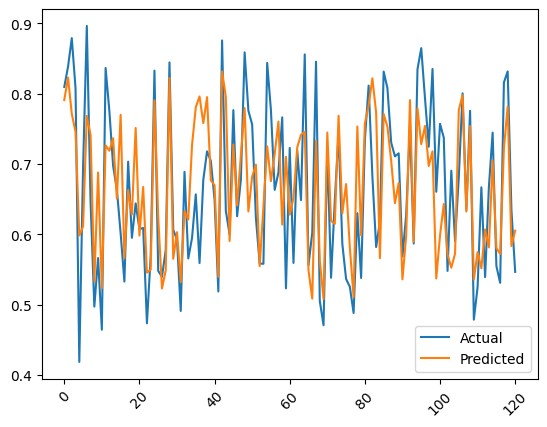

In [ ]:
plt.plot(y_test[0:121], label='Actual')
plt.plot(y_predict_rfr[0:121], label='Predicted')
plt.xticks(rotation=45)
plt.legend()
plt.show()